# Training a CIFAR10 image classifier
---

- **Framework:** PyTorch
- **Model Architecture:** LeNet
- **Dataset:** CIFAR10

We will do the following steps in order:
1. Load and normalizing the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolutional Neural Network (CNN)
3. Define a loss function
4. Train the network on the training data
5. Evaluate the network on the test data

## Google Colab Setup

In [ ]:
# !pip install -U torchvision

In [1]:
 from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/MyDrive/COSCI224 Machine Learning 3 Notebooks/data/'
MODEL_DIR = '/content/drive/MyDrive/COSCI224 Machine Learning 3 Notebooks/models/'

# DATA_DIR = 'data/'
# MODEL_DIR = 'models/'

ValueError: mount failed

# 1. Loading and normalizing CIFAR10
---
Using `torchvision`, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=DATA_DIR, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=DATA_DIR, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import multiprocessing
print(multiprocessing.cpu_count())

2


Let us show some of the training images, for fun.



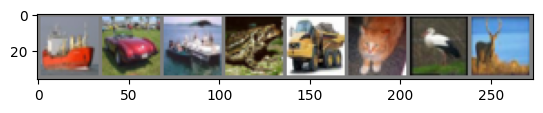

 ship   car  ship  frog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Define a Convolutional Neural Network
---
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 3. Define a Loss function and optimizer
---
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the network
---
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device) # For putting stuff on gpu
net.to(device) # For putting stuff on gpu

max_epochs = 2
print_every_x_iters = 100
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #print("Epoch [", epoch, " out of", max_epochs, "], Iteration [", i, " out of ", len(trainloader), "] ")

        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # For putting stuff on gpu

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % print_every_x_iters == print_every_x_iters-1:    # print every 2000 mini-batches
            print("Epoch [", epoch, " out of", max_epochs, "], Iteration [", i, " out of ", len(trainloader), "] ")
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/print_every_x_iters))
            running_loss = 0.0

print('Finished Training')

cuda:0
Epoch [ 0  out of 2 ], Iteration [ 99  out of  6250 ] 
[1,   100] loss: 2.304
Epoch [ 0  out of 2 ], Iteration [ 199  out of  6250 ] 
[1,   200] loss: 2.302
Epoch [ 0  out of 2 ], Iteration [ 299  out of  6250 ] 
[1,   300] loss: 2.301
Epoch [ 0  out of 2 ], Iteration [ 399  out of  6250 ] 
[1,   400] loss: 2.300
Epoch [ 0  out of 2 ], Iteration [ 499  out of  6250 ] 
[1,   500] loss: 2.297
Epoch [ 0  out of 2 ], Iteration [ 599  out of  6250 ] 
[1,   600] loss: 2.301
Epoch [ 0  out of 2 ], Iteration [ 699  out of  6250 ] 
[1,   700] loss: 2.298
Epoch [ 0  out of 2 ], Iteration [ 799  out of  6250 ] 
[1,   800] loss: 2.293
Epoch [ 0  out of 2 ], Iteration [ 899  out of  6250 ] 
[1,   900] loss: 2.285
Epoch [ 0  out of 2 ], Iteration [ 999  out of  6250 ] 
[1,  1000] loss: 2.277
Epoch [ 0  out of 2 ], Iteration [ 1099  out of  6250 ] 
[1,  1100] loss: 2.254
Epoch [ 0  out of 2 ], Iteration [ 1199  out of  6250 ] 
[1,  1200] loss: 2.219
Epoch [ 0  out of 2 ], Iteration [ 1299  out

# 5. Evaluate the network on the test data
---
We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



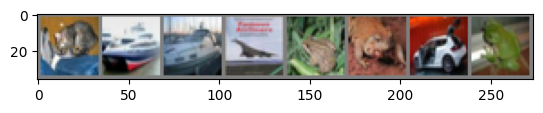

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images.to(device))

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


The results seem pretty good. Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


This looks respectable! What are the classes that performed well, and the classes that did not perform well?

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 76 %
Accuracy of  bird : 19 %
Accuracy of   cat : 35 %
Accuracy of  deer : 43 %
Accuracy of   dog : 33 %
Accuracy of  frog : 69 %
Accuracy of horse : 69 %
Accuracy of  ship : 76 %
Accuracy of truck : 54 %


<div class="alert alert-block alert-warning">

# ⚠️ WARM-UP ⚠️
Train a model that achieves **90\% accuracy** on CIFAR-10.
</div>